In [1]:
###########
# IMPORTS
###########

# Used for data structuring, and executing operations on the data present
import pandas as pd
# Used for matrix manipulation, as well as other uses
import numpy as np
# Used for data visualization
import seaborn as sns
# Used also for data visualization
import matplotlib.pyplot as plt

[Dataset](https://www.kaggle.com/datasets/sujithmandala/obesity-classification-dataset)

This dataset comprises of obesity classification among individuals, and it contains basic information like their height, weight, gender, and age. Based off that, it lists what their `label` is (what type of weight they have, normal, underweight, obese, etc). We will be extracting this data into a dataframe, and most likely processing the categorical values. After doing so, we can scale the data, and then look for any outliers among the dataset.

In [6]:
# Reading in the data
obesity_df = pd.read_csv('./Obesity Classification.csv', index_col=0)

# Printing out it's first 5 rows
obesity_df.head()

,Age,Gender,Height,Weight,BMI,Label
ID,,,,,,
1,25,Male,175,80,25.3,Normal Weight
2,30,Female,160,60,22.5,Normal Weight
3,35,Male,180,90,27.3,Overweight
4,40,Female,150,50,20.0,Underweight
5,45,Male,190,100,31.2,Obese


### 1.1 Scaling (normalizing) the data

Here we will be normalizing the data for the model, by reducing the gaps between the values, and bringing down the curve to a manageable size to pass onto the model, we can achieve a high scoring model by completing this pipeline.

In [40]:
# Used for scaling the data
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

continuous_columns = ['Age', 'Height', 'Weight', 'BMI']

# Take the dataframe, scale it, and create a new dataframe from the scaled values (from the original)
scaled_obesity_continuous_values = pd.DataFrame(scaler.fit_transform(obesity_df[continuous_columns]), columns=continuous_columns)

scaled_obesity_df = obesity_df.copy()
scaled_obesity_df[continuous_columns] = scaled_obesity_continuous_values

# Display the first 5 columns
scaled_obesity_df.head()

,Age,Gender,Height,Weight,BMI,Label
ID,,,,,,
1,-0.672829,Male,-0.236952,0.017730,0.258448,Normal Weight
2,-0.469625,Female,0.483917,1.062214,0.894325,Normal Weight
3,-0.266422,Male,-0.597387,-0.330431,-0.072738,Overweight
4,-0.063219,Female,0.844352,1.410375,1.410975,Underweight
5,0.139984,Male,-0.957822,-0.678592,-0.509904,Obese


### 1.2 Handling Categorical variables

Here we will be utilizing `pandas` method called `get_dummies`, which allows us to generate a modified dataframe of the original, but with all categorical columns one-hot-encoded, which assigns columns for each unique categorical value in that column, and represent whether the row had the value, which is the name of the column, present with either a 0 (for not present) or a 1 (for present)

In [41]:
## Looking at the data, we have 6 different columns, two are categorical, which we can use get_dummies to achieve the OHE of those variables
ohe_obesity_df = pd.get_dummies(scaled_obesity_df, columns=['Gender', 'Label'])

# Printing out the one-hot-encoded data
ohe_obesity_df.head()

,Age,Height,Weight,BMI,Gender_Female,Gender_Male,Label_Normal Weight,Label_Obese,Label_Overweight,Label_Underweight
ID,,,,,,,,,,
1,-0.672829,-0.236952,0.017730,0.258448,0,1,1,0,0,0
2,-0.469625,0.483917,1.062214,0.894325,1,0,1,0,0,0
3,-0.266422,-0.597387,-0.330431,-0.072738,0,1,0,0,1,0
4,-0.063219,0.844352,1.410375,1.410975,1,0,0,0,0,1
5,0.139984,-0.957822,-0.678592,-0.509904,0,1,0,1,0,0


<Axes: xlabel='0'>

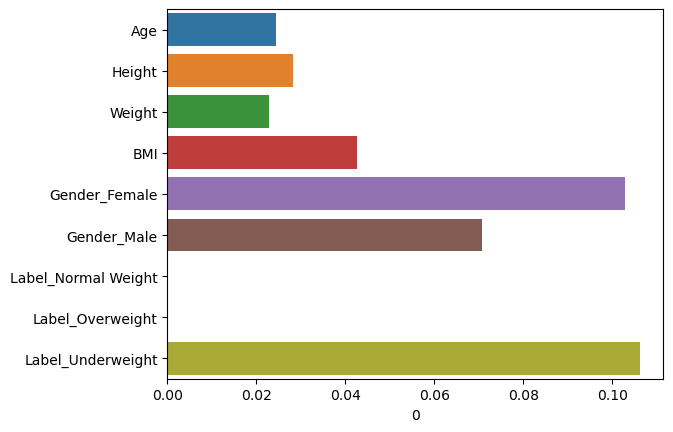

In [76]:
# Used for 
from sklearn.feature_selection import mutual_info_classif
from sklearn.impute import SimpleImputer


x = ohe_obesity_df.drop(columns=['Label_Obese'])

nan_columns = [col for col in x.columns if x[col].hasnans]

x[nan_columns] = SimpleImputer().fit_transform(x[nan_columns])

y = ohe_obesity_df['Label_Obese']

mutual_information_ratings = pd.DataFrame(mutual_info_classif(x, y).reshape(1, 9), columns=x.columns)

sns.barplot(x=mutual_information_ratings.loc[0], y=mutual_information_ratings.columns)

### 1.3 Data Analysis

As we can see from the chart, `Label_Underweight` seems to have a major correlation with `Label_Obese`, along with `Gender_Female`. `BMI` and `Height` also have really high MI scores. We can perhaps introduce a new variable called `BMI / Height`, to see if that scores high as well.

<Axes: xlabel='0'>

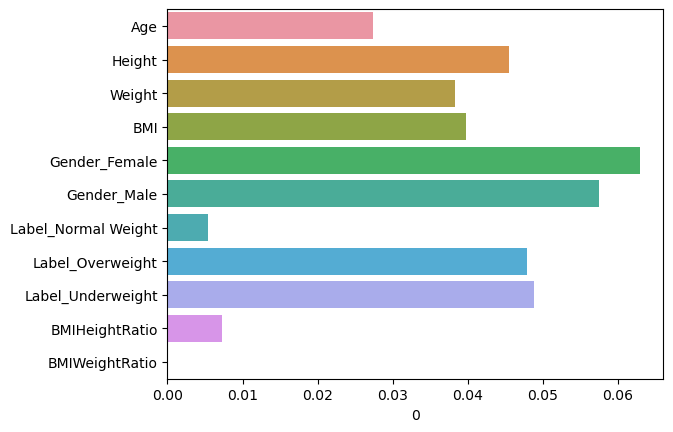

In [82]:
x_fe = x.copy()
x_fe['BMIHeightRatio'] = x_fe['BMI'] / x_fe['Height']
x_fe['BMIWeightRatio'] = x_fe['BMI'] / x_fe['Weight']

updated_mi_scores = pd.DataFrame(mutual_info_classif(x_fe, y).reshape(1, len(x_fe.columns)), columns=x_fe.columns)

sns.barplot(x=updated_mi_scores.loc[0], y=updated_mi_scores.columns)